# 단순 선형회귀

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

### 아버지와 아들의 키 = Glaton

In [2]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


- 아버지와 아들의 키만 발췌

In [3]:
# Filtering - 아들의 키

df = df[df.Gender == 'M']
df.head(3) 

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
4,2,75.5,66.5,M,73.5,4
5,2,75.5,66.5,M,72.5,4


In [6]:
# Selection - 아버지와 아들 데이터만 선택
df = df[['Father', 'Height']]
df.head(3)

,Father,Height
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5


In [8]:
# 한 줄로 줄이면
# df = df[df.Gender == 'M'][['Father', 'Height']]
df.rename(columns= {'Height' : 'Son'}, inplace=True)
df.head()

,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5


In [9]:
# inch를 cm로 바꾸기
df = df *2.54  #  inch - cm  차이 나는 만큼 곱해주기
df.head()

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150
8,190.50,180.340
10,190.50,179.070


- 산점도 그리기

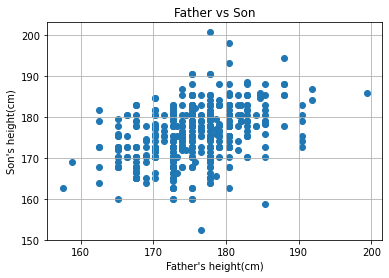

In [10]:
plt.scatter(df.Father, df.Son)
plt.grid()
plt.xlabel("Father's height(cm)")
plt.ylabel("Son's height(cm)")
plt.title('Father vs Son')
plt.show()

- 회귀선 구하기

In [12]:
weight, bias = np.polyfit(df.Father, df.Son, 1)
weight, bias

(0.44774791760302307, 97.17763700739373)

In [16]:
np.polyfit(df.Father, df.Son, 2)

array([6.10561389e-04, 2.32817725e-01, 1.16071746e+02])

In [13]:
xs = np.array([156, 201])
ys = xs * weight + bias
ys

array([167.02631215, 187.17496845])

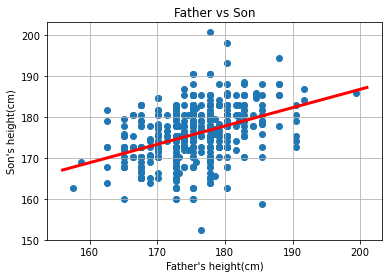

In [15]:
plt.scatter(df.Father, df.Son)
plt.plot(xs, ys, 'r-', lw=3)
plt.grid()
plt.xlabel("Father's height(cm)")
plt.ylabel("Son's height(cm)")
plt.title('Father vs Son')
plt.show()

- Scikit-Learn 으로 회귀식 구하기

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [27]:
lr.fit(df.Father.values.reshape(-1,1), df.Son.values)

LinearRegression()

In [28]:
# 기울기, wieght
lr.coef_

array([0.44774792])

In [29]:
# 절편, bias
lr.intercept_

97.17763700739346

In [30]:
weight, bias 

(0.44774791760302307, 97.17763700739373)

In [31]:
# 잔차 제곱의 합(RSS: Residual Sum of Square)

lr._residues

17556.59951549399

In [33]:
# R quared - 성능 평가 요소 
# 성능이 썩 좋지 않음..ㅋ

lr.score(df.Father.values.reshape(-1,1), df.Son.values)

0.15312927478306992